In [25]:
import random as rd
import matplotlib.pyplot as plt
import time
import numpy as np
from PIL import Image
import os
import itertools as it

In [26]:
maior = 0
O_quao_grande_eu_quiser = 20
A_repeticao_que_eu_quiser = 1000
maior_numero = {}
chaves = {}

numeros_aleatorios = []
for i in range(1,A_repeticao_que_eu_quiser):
    numeros_aleatorios.append(rd.randint(1, O_quao_grande_eu_quiser))
    
for i in range(1,O_quao_grande_eu_quiser):
    chaves[i] = numeros_aleatorios.count(i)

print(chaves)


{1: 53, 2: 48, 3: 64, 4: 55, 5: 52, 6: 40, 7: 47, 8: 68, 9: 43, 10: 47, 11: 49, 12: 50, 13: 35, 14: 40, 15: 44, 16: 57, 17: 52, 18: 36, 19: 63}


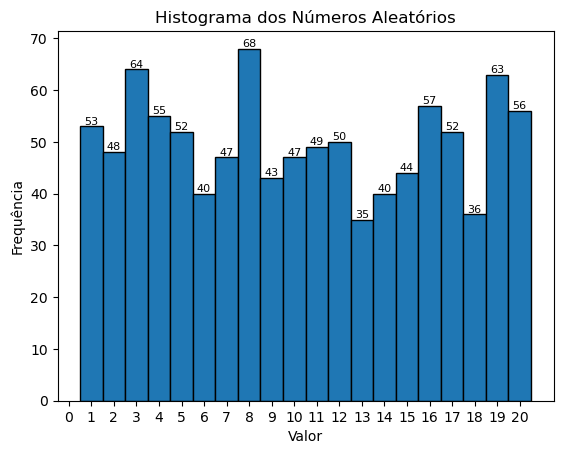

In [33]:
import matplotlib.pyplot as plt

counts, bins, patches = plt.hist(numeros_aleatorios, bins=range(1, O_quao_grande_eu_quiser + 2), edgecolor='black', align='left')

plt.xlabel('Valor')
plt.ylabel('Frequência')
plt.title('Histograma dos Números Aleatórios')
plt.xticks(range(0, O_quao_grande_eu_quiser + 1, 1))

for count, bin, patch in zip(counts, bins, patches):
    height = patch.get_height()
    plt.text(patch.get_x() + patch.get_width() / 2, height, int(count), ha='center', va='bottom', fontsize=8)

plt.show()


In [28]:
Max_val = 0

for i in range(1,O_quao_grande_eu_quiser):
    if Max_val < chaves[i]:
        Max_val = chaves[i]
        index = i

print(f'O maior valor é {index} com {Max_val} vezes')

O maior valor é 8 com 68 vezes


In [29]:
Colador = [0] * A_repeticao_que_eu_quiser
for i in range(1,O_quao_grande_eu_quiser):
    Colador[chaves[i]] = i


In [30]:
ordem = []
listas_das_listas = []
for i in range(1,11):
    ordem.append(chaves[i])
i = 0
passo=0
trocas=0
while(i < len(ordem)-1):
    if ordem[i] < ordem[i+1]:
        aux = ordem[i]
        ordem[i] = ordem[i+1]
        ordem[i+1] = aux
        listas_das_listas.append(ordem)
        i = 0
        trocas+=1
    else:
        i+=1
    passo+=1
print(f'São necessárias {trocas} trocas e {passo} passos')


São necessárias 16 trocas e 80 passos


In [31]:
def plot_histogram(data, step, temp_dir):
    plt.figure(figsize=(8, 6))
    plt.bar(range(len(data)), data, color='skyblue')
    plt.title(f'Passo {step}')
    plt.xlabel('Índice')
    plt.ylabel('Valor')
    plt.savefig(os.path.join(temp_dir, f'step_{step}.png'))
    plt.close()

def create_sorting_gif(ordem):
    temp_dir = "temp_images"
    os.makedirs(temp_dir, exist_ok=True)
    filenames = []
    plot_histogram(ordem, 0, temp_dir)
    filenames.append(os.path.join(temp_dir, 'step_0.png'))
    step = 1
    listas_das_listas = [ordem.copy()]  
    i = 0

    
    while i < len(ordem) - 1:
        if ordem[i] < ordem[i + 1]:
            ordem[i], ordem[i + 1] = ordem[i + 1], ordem[i]
            listas_das_listas.append(ordem.copy())
            plot_histogram(ordem, step, temp_dir)
            filenames.append(os.path.join(temp_dir, f'step_{step}.png'))
            step += 1
            i = 0
        else:
            i += 1
    
    with Image.open(filenames[0]) as img:
        img.save(
            "sorting_animation.gif",
            save_all=True,
            append_images=[Image.open(f) for f in filenames[1:]],
            duration=1000,  
            loop=1         
        )

    for filename in filenames:
        os.remove(filename)
    os.rmdir(temp_dir)
    print("GIF criado com sucesso!")

ordem = []
listas_das_listas = []
for i in range(1,O_quao_grande_eu_quiser):
    ordem.append(chaves[i])


create_sorting_gif(ordem)

GIF criado com sucesso!


In [32]:
posicao_final = []
for i in range(len(ordem) - 1, -1, -1):
    index = ordem[i]
    
    posicao_final.append(Colador[index])
    print(f'Na posicao {i+1} temos o numero {posicao_final[-1]}')

print('Posição final:', posicao_final)

Na posicao 19 temos o numero 13
Na posicao 18 temos o numero 18
Na posicao 17 temos o numero 14
Na posicao 16 temos o numero 14
Na posicao 15 temos o numero 9
Na posicao 14 temos o numero 15
Na posicao 13 temos o numero 10
Na posicao 12 temos o numero 10
Na posicao 11 temos o numero 2
Na posicao 10 temos o numero 11
Na posicao 9 temos o numero 12
Na posicao 8 temos o numero 17
Na posicao 7 temos o numero 17
Na posicao 6 temos o numero 1
Na posicao 5 temos o numero 4
Na posicao 4 temos o numero 16
Na posicao 3 temos o numero 19
Na posicao 2 temos o numero 3
Na posicao 1 temos o numero 8
Posição final: [13, 18, 14, 14, 9, 15, 10, 10, 2, 11, 12, 17, 17, 1, 4, 16, 19, 3, 8]
